<a href="https://colab.research.google.com/github/yachamashok/water_aenet/blob/main/water_aenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!!cd /content/
!!rm -rf H2O water_aenet aenet sample_data

[]

In [2]:
try:
  import aenet
  print("successfully imported aenet")
except ImportError:
  !! git clone https://github.com/atomisticnet/aenet.git
  !! cd aenet/lib && make
  !! cd aenet/src && make -f makefiles/Makefile.gfortran_serial
  !! cd aenet/src && make -f makefiles/Makefile.gfortran_serial lib
  !! cd aenet/python3 && python3 setup.py build_ext --inplace
  !! cd aenet/python3 && pip install -e . --user
  print("completed installation of aenet")

completed installation of aenet


In [3]:
import os
if not os.path.exists('water_aenet'):
  !! git clone https://github.com/yachamashok/water_aenet.git 
else:
  print("Tutorial files are already installed.")
!!cd water_aenet/
!!unzip water_aenet/H2O.zip

['Archive:  water_aenet/H2O.zip',
 '   creating: H2O/',
 '   creating: H2O/Water/',
 '  inflating: H2O/Water/train0500_380.xsf  ',
 '  inflating: H2O/Water/train0500_382.xsf  ',
 '  inflating: H2O/Water/train0500_384.xsf  ',
 '  inflating: H2O/Water/train0500_385.xsf  ',
 '  inflating: H2O/Water/train0500_386.xsf  ',
 '  inflating: H2O/Water/train0500_388.xsf  ',
 '  inflating: H2O/Water/train0500_389.xsf  ',
 '  inflating: H2O/Water/train0500_391.xsf  ',
 '  inflating: H2O/Water/train0500_393.xsf  ',
 '  inflating: H2O/Water/train0500_396.xsf  ',
 '  inflating: H2O/Water/train0500_398.xsf  ',
 '  inflating: H2O/Water/train0500_399.xsf  ',
 '  inflating: H2O/Water/train0500_400.xsf  ',
 '  inflating: H2O/Water/train0500_401.xsf  ',
 '  inflating: H2O/Water/train0500_404.xsf  ',
 '  inflating: H2O/Water/train0500_405.xsf  ',
 '  inflating: H2O/Water/train0500_407.xsf  ',
 '  inflating: H2O/Water/train0500_408.xsf  ',
 '  inflating: H2O/Water/train0500_409.xsf  ',
 '  inflating: H2O/Wate

In [4]:
import numpy as np
import pandas as pd
import re
from IPython.display import Image
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 15})
plt.close("all")

In [5]:
try:
  import ase
  print("successfully imported ase")
except ImportError:
  !! pip install ase --user --upgrade
  print("completed installing ASE")

successfully imported ase


In [6]:
try:
  import aenet
  import ase
  print("Both aenet and ase could be imported. You are all set for the tutorial.")
except ImportError:
  print("The notebook needs to be restarted. Run this cell again once the restart is done.")
  import os
  os.kill(os.getpid(), 9)
import ase
import ase.spacegroup
import ase.visualize
atoms = ase.io.read("/content/H2O/Water/train0500_378.xsf")
ase.visualize.view(atoms, viewer='x3d')

Both aenet and ase could be imported. You are all set for the tutorial.


In [7]:
%cd /content/H2O/01-generate/
%ls
! head -n 15 gen.in

/content/H2O/01-generate
gen.in  H.fingerprint.stp  O.fingerprint.stp
OUTPUT H2O.train

TYPES
2
O   0.0  ! eV
H   0.0  ! eV

SETUPS
O   O.fingerprint.stp
H   H.fingerprint.stp

FILES
1509
../Water/train0500_378.xsf
../Water/train0500_379.xsf


In [8]:
!cat H.fingerprint.stp

DESCR
  Structural fingerprint setup for H in bulk H2O.
  Ref.: N. Artrith and A. Urban, Comp. Mater. Sci. (2016)
END DESCR

ATOM H

ENV  2
H
O

RMIN 0.75d0

SYMMFUNC type=Behler2011
70
G=2 type2=O   eta=0.003214  Rs=0.0000  Rc=6.5000
G=2 type2=H  eta=0.003214  Rs=0.0000  Rc=6.5000
G=2 type2=O   eta=0.035711  Rs=0.0000  Rc=6.5000
G=2 type2=H  eta=0.035711  Rs=0.0000  Rc=6.5000
G=2 type2=O   eta=0.071421  Rs=0.0000  Rc=6.5000
G=2 type2=H  eta=0.071421  Rs=0.0000  Rc=6.5000
G=2 type2=O   eta=0.124987  Rs=0.0000  Rc=6.5000
G=2 type2=H  eta=0.124987  Rs=0.0000  Rc=6.5000
G=2 type2=O   eta=0.214264  Rs=0.0000  Rc=6.5000
G=2 type2=H  eta=0.214264  Rs=0.0000  Rc=6.5000
G=2 type2=O   eta=0.357106  Rs=0.0000  Rc=6.5000
G=2 type2=H  eta=0.357106  Rs=0.0000  Rc=6.5000
G=2 type2=O   eta=0.714213  Rs=0.0000  Rc=6.5000
G=2 type2=H  eta=0.714213  Rs=0.0000  Rc=6.5000
G=2 type2=O   eta=1.428426  Rs=0.0000  Rc=6.5000
G=2 type2=H  eta=1.428426  Rs=0.0000  Rc=6.5000
G=4 type2=O  type3=O    eta=0.000357 l

In [9]:
!!rm -rf H2O.train
! /content/aenet/bin/generate.x-2.0.4-gfortran_serial gen.in > generate.out
print("Reference data set generation completed")
%ls

Reference data set generation completed
generate.out  gen.in  H2O.train  H.fingerprint.stp  O.fingerprint.stp


In [10]:
%ls
!cat generate.out

Streaming output truncated to the last 5000 lines.
      1   O      10
      2   H       4
      3   H      13
      4   O       7
      5   H       5
      6   H       7
      7   O       9
      8   H      10
      9   H      11
     10   O       5
     11   H       9
     12   H       6
     13   O      16
     14   H      17
     15   H      11
     16   O       7
     17   H       7
     18   H       8
   1249      18       2  -2.54830700E+01  ../Water/train2000_1682.xsf
      1   O      10
      2   H      14
      3   H      12
      4   O       8
      5   H       7
      6   H       6
      7   O      10
      8   H      12
      9   H       6
     10   O       6
     11   H       6
     12   H      10
     13   O      14
     14   H      15
     15   H      10
     16   O       7
     17   H       8
     18   H       7
   1250      18       2  -2.54833934E+01  ../Water/train2000_1683.xsf
      1   O      11
      2   H      13
      3   H      14
      4   O       7
      5  

In [11]:
%cd /content/H2O/02-train/
%ls

/content/H2O/02-train
train.in


In [12]:
%cat train.in

TRAININGSET H2O.train
TESTPERCENT 20
ITERATIONS  50

MAXENERGY 0.0

TIMING

SAVE_ENERGIES

METHOD
lm batchsize=8000 learnrate=0.1d0 iter=3 conv=0.001 adjust=5.0

! METHOD 1 Steepest Descent
! online_sd gamma=5.0d-7 alpha=0.25d0
! online_sd gamma=1.0d-8 alpha=0.25d0
!
! METHOD 2 Limited-Memory BFGS
! bfgs
!
! METHOD 3 Levenberg-Marquardt
! lm batchsize=8000 learnrate=0.1d0 iter=3 conv=0.001 adjust=5.0

NETWORKS
! atom   network         hidden
! types  file-name       layers  nodes:activation
  O       O.10tw-10tw.ann   2    10:tanh 10:tanh
  H       H.10tw-10tw.ann   2    10:tanh 10:tanh


In [13]:
! rm -r H2O.train
! cp ../01-generate/H2O.train .
%ls

rm: cannot remove 'H2O.train': No such file or directory
H2O.train  train.in


In [14]:
! rm -r TRAIN.0 TEST.0 H.* O.*
! /content/aenet/bin/train.x-2.0.4-gfortran_serial train.in | tee train.out
%ls

Streaming output truncated to the last 5000 lines.
          type       = Behler2011 4
          covariance =    2.4329039165746655E-029
          average    =    2.8734735003314306E-016
          min, max   =    0.0000000000000000        2.0981569562004425E-013
          This means at least one fingerprint function for O is always equal to zero!
          Maybe an atomic species is not present in the reference set?
          type       = Behler2011 4
          covariance =    2.4329039165746655E-029
          average    =    2.8734735003314306E-016
          min, max   =    0.0000000000000000        2.0981569562004425E-013
          This means at least one fingerprint function for O is always equal to zero!
          Maybe an atomic species is not present in the reference set?
          type       = Behler2011 4
          covariance =    2.4329039165746655E-029
          average    =    2.8734735003314306E-016
          min, max   =    0.0000000000000000        2.0981569562004425E-013

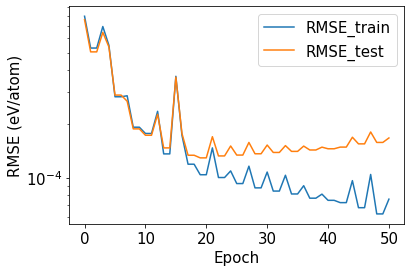

In [15]:
errors = []
with open("/content/H2O/02-train/train.out") as fp:
  for line in fp:
    if re.match("^ *[0-9].*<$", line):
      errors.append([float(a) for a in line.split()[1:-1]])
errors = np.array(errors)
errors = pd.DataFrame(
    data=errors, 
    columns=['MAE_train', 'RMSE_train', 'MAE_test', 'RMSE_test'])
ax = errors[['RMSE_train', 'RMSE_test']].plot(logy=True)
ax.set_xlabel("Epoch"); ax.set_ylabel("RMSE (eV/atom)")
plt.show()

<ipython-input-19-12509f13d1d4>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(aspect = 1,
<ipython-input-19-12509f13d1d4>:9: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(aspect = 1,


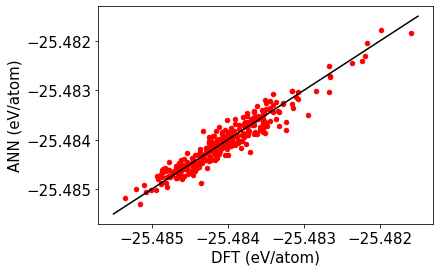

In [19]:
test = "/content/H2O/02-train/energies.test.0"
test_errors = np.loadtxt(test, skiprows=1, usecols=(3,4))
limits = np.linspace(-25.4815, -25.4855)
plt.plot(limits, limits, color="black")
plt.ticklabel_format(useOffset=False)
plt.scatter(test_errors[:,0], test_errors[:,1], color="red", s=20, label="validation")
plt.xlabel('DFT (eV/atom)')
plt.ylabel('ANN (eV/atom)')
ax.set(aspect = 1,
       xlim=(-25.488, -25.480),
       ylim=(-25.488, -25.480))
plt.show()

In [17]:
%cd /content/H2O/03-predict/
!cp ../02-train/H.10tw-10tw.ann .
!cp ../02-train/O.10tw-10tw.ann .
! /content/aenet/bin/predict.x-2.0.4-gfortran_serial predict.in | tee predict.out
%ls

Streaming output truncated to the last 5000 lines.
          type       = Behler2011 4
          covariance =    2.4329039165746655E-029
          average    =    2.8734735003314306E-016
          min, max   =    0.0000000000000000        2.0981569562004425E-013
          This means at least one fingerprint function for O is always equal to zero!
          Maybe an atomic species is not present in the reference set?
          type       = Behler2011 4
          covariance =    2.4329039165746655E-029
          average    =    2.8734735003314306E-016
          min, max   =    0.0000000000000000        2.0981569562004425E-013
          This means at least one fingerprint function for O is always equal to zero!
          Maybe an atomic species is not present in the reference set?
          type       = Behler2011 4
          covariance =    2.4329039165746655E-029
          average    =    2.8734735003314306E-016
          min, max   =    0.0000000000000000        2.0981569562004425E-013